# Data Modeling 

In [1]:
#libraries required
import pandas as pd 
import numpy as np
import os
import sys
import pathlib

In [2]:
#globally set column display options
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
#load dataset
file_path = "../data/processed/combined_shot_events_processed.csv"

df= pd.read_csv(file_path)

print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

Dataset has 7863 rows and 21 columns


In [4]:
#confirm no missing values
print(df.isna().mean()*100)

#confirm data types
print(f"\n Data types in dataset \n{df.dtypes}")

location             0.0
type_event           0.0
play_pattern         0.0
shot_xg              0.0
shot_end_location    0.0
shot_outcome         0.0
shot_technique       0.0
body_part            0.0
shot_type            0.0
under_pressure       0.0
aerial_shot_won      0.0
first_time_shot      0.0
deflected_shot       0.0
1v1_shot             0.0
open_goal_shot       0.0
shot_redirected      0.0
source               0.0
x_coordinate         0.0
y_coordinate         0.0
shot_distance        0.0
shot_angle           0.0
dtype: float64

 Data types in dataset 
location              object
type_event            object
play_pattern          object
shot_xg              float64
shot_end_location     object
shot_outcome          object
shot_technique        object
body_part             object
shot_type             object
under_pressure         int64
aerial_shot_won        int64
first_time_shot        int64
deflected_shot         int64
1v1_shot               int64
open_goal_shot         int64


In [5]:
print(df.columns)

print(f"\nColumn data types:\n{df.dtypes}")

Index(['location', 'type_event', 'play_pattern', 'shot_xg',
       'shot_end_location', 'shot_outcome', 'shot_technique', 'body_part',
       'shot_type', 'under_pressure', 'aerial_shot_won', 'first_time_shot',
       'deflected_shot', '1v1_shot', 'open_goal_shot', 'shot_redirected',
       'source', 'x_coordinate', 'y_coordinate', 'shot_distance',
       'shot_angle'],
      dtype='object')

Column data types:
location              object
type_event            object
play_pattern          object
shot_xg              float64
shot_end_location     object
shot_outcome          object
shot_technique        object
body_part             object
shot_type             object
under_pressure         int64
aerial_shot_won        int64
first_time_shot        int64
deflected_shot         int64
1v1_shot               int64
open_goal_shot         int64
shot_redirected        int64
source                object
x_coordinate         float64
y_coordinate         float64
shot_distance        float64
shot_

In [6]:
sys.path.append("C:/Users/On3B3/OneDrive/Documents/Programming_Projects/xG_Model/src")
#import user-defined Class for shot calculations
from helperFunctions import typeToCategory

In [7]:
#categorical features
cat_features =['shot_type','body_part','first_time_shot','1v1_shot','shot_outcome',
               'under_pressure','aerial_shot_won','open_goal_shot','deflected_shot',
               'shot_redirected','play_pattern','shot_technique'
               ]

df_xg= df.copy() 
#Change to category
df_xg=typeToCategory(df_xg,cat_features)


Data types for categorical features : 
shot_type          category
body_part          category
first_time_shot    category
1v1_shot           category
shot_outcome       category
under_pressure     category
aerial_shot_won    category
open_goal_shot     category
deflected_shot     category
shot_redirected    category
play_pattern       category
shot_technique     category
dtype: object


In [8]:
#Feature selection
df_xg.head()

,location,type_event,play_pattern,shot_xg,shot_end_location,shot_outcome,shot_technique,body_part,shot_type,under_pressure,aerial_shot_won,first_time_shot,deflected_shot,1v1_shot,open_goal_shot,shot_redirected,source,x_coordinate,y_coordinate,shot_distance,shot_angle
0,"[103.7, 33.9]",Shot,From Counter,0.056426,"[120.0, 42.8, 1.5]",Goal,Normal,Right Foot,Open Play,0,0,0,0,0,0,0,afcon_2023_shots,103.7,33.9,17.404023,0.390927
1,"[114.4, 34.0]",Shot,From Corner,0.091472,"[120.0, 35.6, 4.3]",Off T,Normal,Head,Open Play,1,1,0,0,0,0,0,afcon_2023_shots,114.4,34.0,8.207314,0.649624
2,"[111.8, 48.3]",Shot,Regular Play,0.048079,"[120.0, 50.7, 7.0]",Off T,Half Volley,Left Foot,Open Play,0,0,1,0,0,0,0,afcon_2023_shots,111.8,48.3,11.667476,0.454854
3,"[104.1, 45.3]",Shot,Regular Play,0.157784,"[112.7, 41.8, 0.2]",Saved,Normal,Right Foot,Open Play,1,0,0,1,0,0,0,afcon_2023_shots,104.1,45.3,16.760072,0.410384
4,"[96.7, 19.9]",Shot,From Free Kick,0.008891,"[120.0, 55.3, 0.5]",Off T,Normal,Left Foot,Open Play,1,0,0,0,0,0,0,afcon_2023_shots,96.7,19.9,30.771740,0.180712


The following features will not be included as predictors; 
1.  location - as is not useful in logistic regression model
2.  type_event - no variance in data type
3.  shot_xg - will be used for comparison of predicted value
4.  x_coordinate
5.  y_coordinate
6.  shot_end_location - as is not useful but can be engineered to derive where shot ended. (data leakage in training)
7.  shot_outcome - this is target value to be predicted (will convert to binary 1-goal, 0-no goal)
8.  shot redirected - low variance (less than 1%)
9.  deflected_shot - low variance (less than 2%)
10. open_goal_shot - low variance (less than 1%)

to further narrow the list


In [9]:
for f in df_xg.columns:
    if df_xg[f].dtypes == 'category':
        print(f"\n{f}: {df_xg[f].value_counts()}")


play_pattern: play_pattern
Regular Play      2496
From Free Kick    1525
From Throw In     1375
From Corner       1240
Other              370
From Goal Kick     317
From Counter       314
From Keeper        134
From Kick Off       92
Name: count, dtype: int64

shot_outcome: shot_outcome
Off T               2506
Blocked             2061
Saved               1706
Goal                 913
Wayward              485
Post                 155
Saved to Post         23
Saved Off Target      14
Name: count, dtype: int64

shot_technique: shot_technique
Normal           6264
Half Volley       952
Volley            461
Lob                67
Diving Header      45
Overhead Kick      44
Backheel           30
Name: count, dtype: int64

body_part: body_part
Right Foot    4072
Left Foot     2375
Head          1370
Other           46
Name: count, dtype: int64

shot_type: shot_type
Open Play    7184
Penalty       354
Free Kick     319
Corner          6
Name: count, dtype: int64

under_pressure: under_pressu

In [10]:
#creating binary target feature
df_xg['goal'] = df_xg['shot_outcome'].apply(lambda x: 1 if x == "Goal" else 0)

#change type to category
df_xg['goal']= df_xg['goal'].astype('category')

#Verify creation of binary target feature
print(f"Verify target feature created: {df_xg['goal'].value_counts()}")

#Verify type changed
print(f"\nData type for feature goal: {df_xg['goal'].dtypes}")

Verify target feature created: goal
0    6950
1     913
Name: count, dtype: int64

Data type for feature goal: category


In [11]:
df.columns

Index(['location', 'type_event', 'play_pattern', 'shot_xg',
       'shot_end_location', 'shot_outcome', 'shot_technique', 'body_part',
       'shot_type', 'under_pressure', 'aerial_shot_won', 'first_time_shot',
       'deflected_shot', '1v1_shot', 'open_goal_shot', 'shot_redirected',
       'source', 'x_coordinate', 'y_coordinate', 'shot_distance',
       'shot_angle'],
      dtype='object')

In [12]:
df_xg.drop([
    'location','type_event','shot_xg','shot_end_location',
    'x_coordinate','y_coordinate','open_goal_shot','shot_redirected',
    'shot_outcome','deflected_shot','source'
            ], 
            axis=1, 
            inplace=True
            )

In [13]:
numeric_features= df_xg.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print numeric features to verify
print("Numeric features:", numeric_features)

#target feature
target = df_xg['goal']

# Get categorical features (non-numeric features)
categorical_features = df_xg.select_dtypes(include=['category']).columns.tolist()
categorical_features = [f for f in categorical_features if f != 'goal']
print("\nCategorical features:", categorical_features)

features= [f for f in df_xg.columns if f != 'goal']
print(f"\n All features for modeling:", features)


Numeric features: ['shot_distance', 'shot_angle']

Categorical features: ['play_pattern', 'shot_technique', 'body_part', 'shot_type', 'under_pressure', 'aerial_shot_won', 'first_time_shot', '1v1_shot']

 All features for modeling: ['play_pattern', 'shot_technique', 'body_part', 'shot_type', 'under_pressure', 'aerial_shot_won', 'first_time_shot', '1v1_shot', 'shot_distance', 'shot_angle']


In [14]:
#Manage low category in shot type
def combine_rare_categories(df, feature, min_samples=10, name='other'):
    """Combine categories with fewer than min_samples into 'Other'"""
    value_counts = df[feature].value_counts()
    rare_categories = value_counts[value_counts < min_samples].index
    df[feature] = df[feature].replace(rare_categories, name)
    return df

# Apply to shot type before train/test split
combine_rare_categories(df_xg, 'shot_type', min_samples=350, name='set pieces')

#verify change
print(f" Verify change in shot_type: \n{df_xg['shot_type'].value_counts()}")

 Verify change in shot_type: 
shot_type
Open Play     7184
Penalty        354
set pieces     325
Name: count, dtype: int64


C:\Users\On3B3\AppData\Local\Temp\ipykernel_37836\327328567.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[feature] = df[feature].replace(rare_categories, name)


In [15]:
#train/test split

#import library
from sklearn.model_selection import train_test_split

In [16]:
X= df_xg[features]
y= target

In [17]:
#split data on 75/25 ratio
X_train,X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=.25,random_state=42)

#Verify split successful
print(f"\nNumber of records in X_train: {len(X_train)/len(df_xg):.2f}")
print(f"\nNumber of records in X_test: {len(X_test)/len(df_xg):.2f}")
print(f"\nNumber of records in y_train: {len(y_train)/len(df_xg):.2f}")
print(f"\nNumber of records in y_test: {len(y_test)/len(df_xg):.2f}")


Number of records in X_train: 0.75

Number of records in X_test: 0.25

Number of records in y_train: 0.75

Number of records in y_test: 0.25


In [18]:
#create preprocessing pipeline

#import libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [19]:
#building preprocessing pipeline 

#preprocessing pipeline
transformer = ColumnTransformer([
    ("scaler",StandardScaler(),numeric_features),
    ("encoder",OneHotEncoder(drop="first"),categorical_features)
])

#Model pipeline

pipe = Pipeline([
    ("preprocess",transformer),
    ("lgr",LogisticRegression(class_weight="balanced"))
])

In [20]:
#Model validation using Cross validation

#import library
from sklearn.model_selection import cross_val_score

In [21]:
#estimate performance of model: cross val= 5
model_est_peformance = cross_val_score(
    pipe,
    X_train,
    y_train,
    cv=5,
    scoring='roc_auc'
)

print("CV AUC Scores:",model_est_peformance)
print("Mean CV AUC:", model_est_peformance.mean())

CV AUC Scores: [0.83239322 0.79256216 0.81171106 0.82335346 0.83030248]
Mean CV AUC: 0.8180644761087976


In [22]:
#Evaluate Train performance

#library required
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve

import matplotlib.pyplot as plt

In [23]:
#fit pipelne on model
pipe.fit(X_train, y_train)

#make predictions using X_tran
y_train_pred = pipe.predict(X_train)

#get prediction probalities of class 1 (goal)
y_train_proba = pipe.predict_proba(X_train)[:,1]


Classification report:
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      5212
           1       0.32      0.70      0.44       685

    accuracy                           0.79      5897
   macro avg       0.64      0.75      0.66      5897
weighted avg       0.88      0.79      0.82      5897


Confusion Matrix: 
[[4195 1017]
 [ 204  481]]
ROC AUC Train Score: 0.83


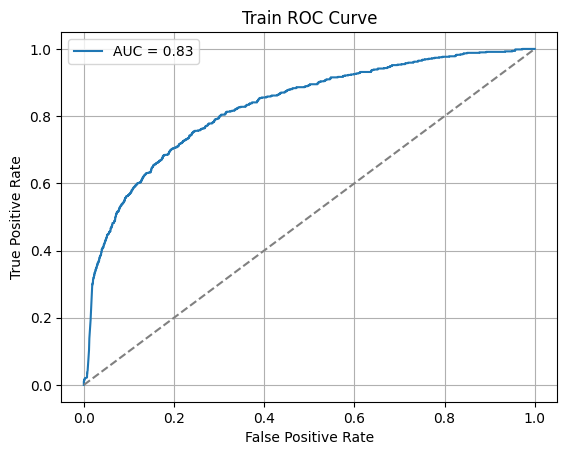

In [24]:
#get classification report
classif_report= classification_report(y_train,y_train_pred)
print(f'\nClassification report:\n{classif_report}')

#get confusion matrix
confu_matrix = confusion_matrix(y_train,y_train_pred)
print(f"\nConfusion Matrix: \n{confu_matrix}")

#create df for confusion matrix
df_cm = pd.DataFrame(confu_matrix, index=["No Goal","Goal"], columns=["No Goal","Goal"])

#ger ROC_AUC score
roc_auc_train=roc_auc_score(y_train, y_train_proba)
print(f"ROC AUC Train Score: {roc_auc_train:.2f}")

#get ROC Curve
false_pr,true_pr, _ =roc_curve(y_train,y_train_proba)
plt.plot(false_pr,true_pr,label=f"AUC = {roc_auc_train:.2f}")
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Train ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

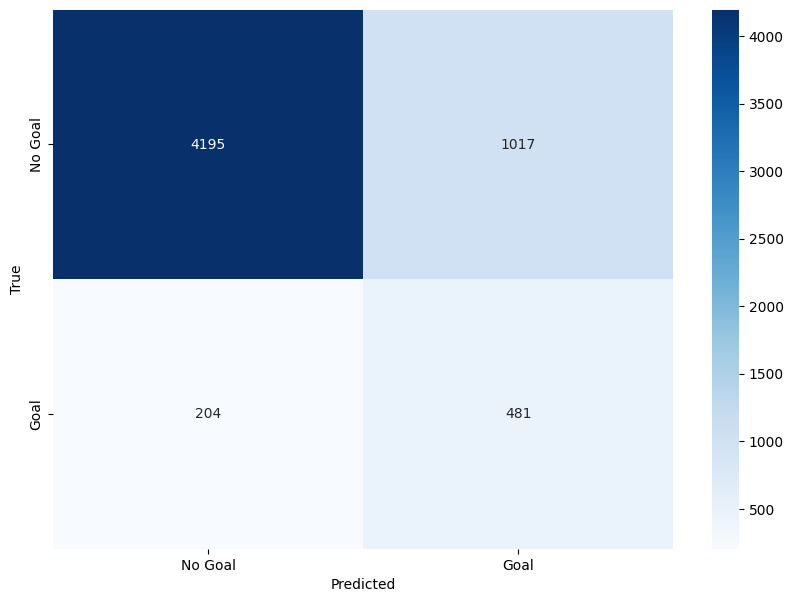

In [25]:
#library
import seaborn as sns

#plot heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df_cm, annot=True,fmt='.0f',cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [26]:
#brier score loss

#library required
from sklearn.metrics import brier_score_loss

brier_score = brier_score_loss(y_train,y_train_proba)
print(f"Train Brier Score Loss: {brier_score:.3f}")

Train Brier Score Loss: 0.159


In [27]:
#Test predictions

#make predictions using X_tran
y_test_pred = pipe.predict(X_test)

#get prediction probalities of class 1 (goal)
y_test_proba = pipe.predict_proba(X_test)[:,1]


Classification report Test:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      1738
           1       0.32      0.72      0.44       228

    accuracy                           0.79      1966
   macro avg       0.64      0.76      0.65      1966
weighted avg       0.88      0.79      0.82      1966


Confusion Matrix for Test: 
[[4195 1017]
 [ 204  481]]
ROC AUC Test Score: 0.83


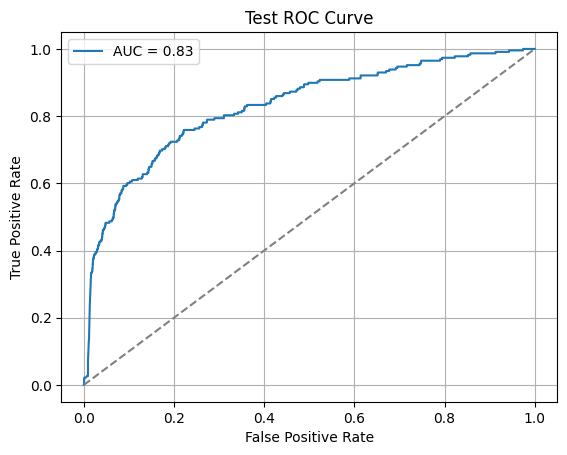

In [28]:
#get classification report
classif_report_test= classification_report(y_test,y_test_pred)
print(f'\nClassification report Test:\n{classif_report_test}')

#get confusion matrix
confu_matrix_test = confusion_matrix(y_test,y_test_pred)
print(f"\nConfusion Matrix for Test: \n{confu_matrix}")

#create df for confusion matrix
df_cm_test = pd.DataFrame(confu_matrix_test, index=["No Goal","Goal"], columns=["No Goal","Goal"])

#ger ROC_AUC score
roc_auc_test=roc_auc_score(y_test, y_test_proba)
print(f"ROC AUC Test Score: {roc_auc_test:.2f}")

#get ROC Curve
false_pos_r,true_pos_r, _ =roc_curve(y_test,y_test_proba)
plt.plot(false_pos_r,true_pos_r,label=f"AUC = {roc_auc_test:.2f}")
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Test ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

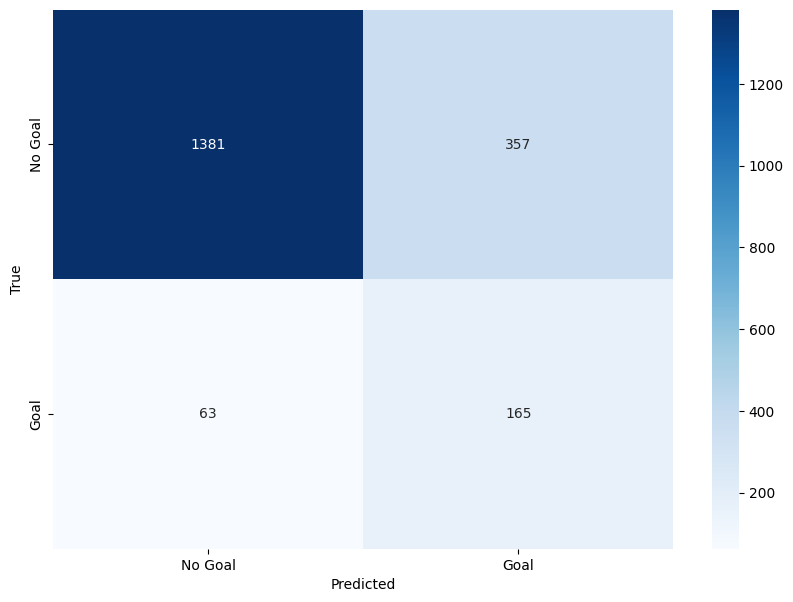

In [29]:
#plot heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_test, annot=True,fmt='.0f',cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [30]:
#Brier Score loss
brier_score_test = brier_score_loss(y_test,y_test_proba)
print(f"Test Brier Score Loss: {brier_score_test:.3f}")

Test Brier Score Loss: 0.162


In [31]:
#Hyperparameter tuning 
from sklearn.model_selection import GridSearchCV

In [32]:
#parameter grid for tuning 
param_grid = {
    'lgr__C': [0.01, 0.1, 1, 10],
    'lgr__penalty': ['l1', 'l2'],
    'lgr__solver': ['liblinear', 'saga'],
    'lgr__max_iter': [100, 200, 300],
    'lgr__tol': [1e-3, 1e-4, 1e-5],
}

#run grid search with cross validation 
grid_search = GridSearchCV(pipe, 
                           param_grid, 
                           cv=5, 
                           scoring='roc_auc',
                           n_jobs=-1
                           )

#Clear memory before running
import gc
gc.collect()

15629

In [33]:
print(pipe)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['shot_distance',
                                                   'shot_angle']),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['play_pattern',
                                                   'shot_technique',
                                                   'body_part', 'shot_type',
                                                   'under_pressure',
                                                   'aerial_shot_won',
                                                   'first_time_shot',
                                                   '1v1_shot'])])),
                ('lgr', LogisticRegression(class_weight='balanced'))])


In [34]:
#fit grid search on training set
grid_search.fit(X_train,y_train)

#get best params
best_params = grid_search.best_params_
print(f"Best parameters for estimator: \n{grid_search.best_params_}")

print("\n Best CV Score:",grid_search.best_score_) #mean cross-validated score of the best estimator

Best parameters for estimator: 
{'lgr__C': 1, 'lgr__max_iter': 100, 'lgr__penalty': 'l2', 'lgr__solver': 'liblinear', 'lgr__tol': 0.001}

 Best CV Score: 0.8179258525326425


In [35]:
#get best model
best_model= grid_search.best_estimator_

#get predictions
y_pred= best_model.predict(X_test)

#get predicted probabilities
y_pred_proba= best_model.predict_proba(X_test)[:,1]


Classification report Test:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      1738
           1       0.32      0.72      0.44       228

    accuracy                           0.79      1966
   macro avg       0.64      0.76      0.65      1966
weighted avg       0.88      0.79      0.82      1966


Confusion Matrix for Test: 
[[1382  356]
 [  63  165]]
ROC AUC Test Score: 0.83


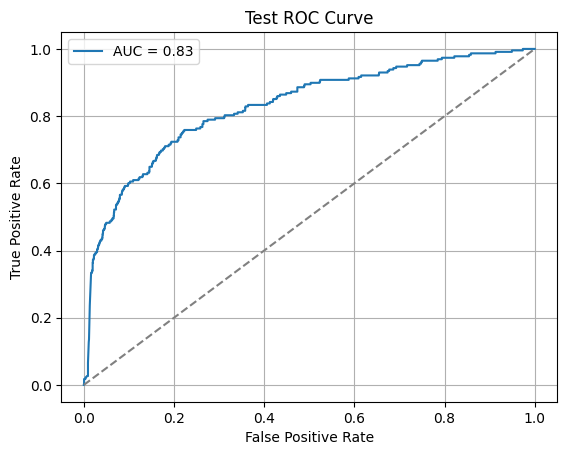

In [36]:
#get classification report
classif_report_pred= classification_report(y_test,y_pred)
print(f'\nClassification report Test:\n{classif_report_test}')

#get confusion matrix
confu_matrix_pred = confusion_matrix(y_test,y_pred)
print(f"\nConfusion Matrix for Test: \n{confu_matrix_pred}")

#create df for confusion matrix
df_cm_pred = pd.DataFrame(confu_matrix_pred, index=["No Goal","Goal"], columns=["No Goal","Goal"])

#ger ROC_AUC score
roc_auc_pred=roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Test Score: {roc_auc_pred:.2f}")

#get ROC Curve
false_pos_rate,true_pos_rate, _ =roc_curve(y_test,y_pred_proba)
plt.plot(false_pos_rate,true_pos_rate,label=f"AUC = {roc_auc_pred:.2f}")
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Test ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

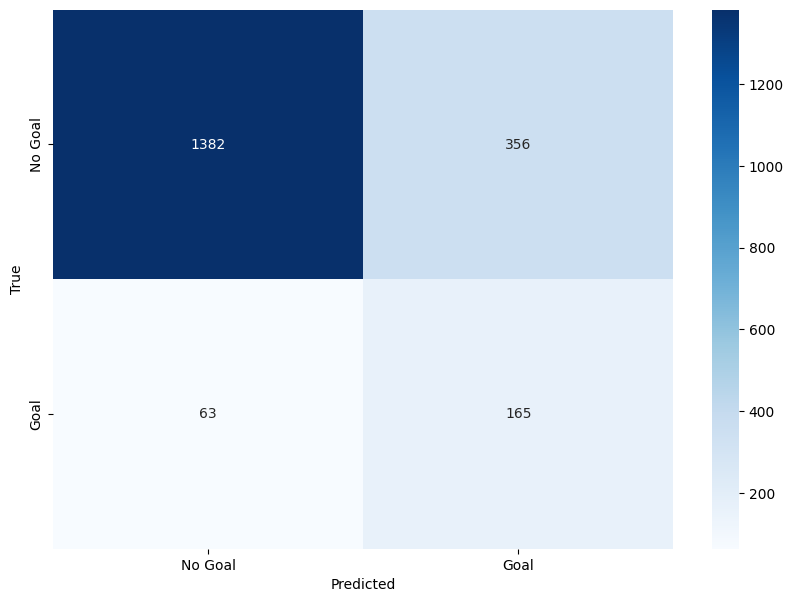

In [37]:
#plot heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_pred, annot=True,fmt='.0f',cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [38]:
#Brier Score loss
brier_score_pred = brier_score_loss(y_test,y_pred_proba)
print(f"Test Brier Score Loss: {brier_score_pred:.3f}")

Test Brier Score Loss: 0.162


In [39]:
#precision-recall curve

#library required
#from sklearn.metrics import precision_recall_curve

#precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

#plt.figure(figsize=(8, 6))
#plt.plot(recall, precision, marker='.')
#plt.title("Precision-Recall Curve")
#plt.xlabel("Recall")
#plt.ylabel("Precision")
#plt.grid(True)
#plt.show()

In [40]:

from sklearn.calibration import CalibratedClassifierCV

# Refit calibration on the best model
calibrator = CalibratedClassifierCV(best_model, method='sigmoid', cv=5)
calibrator.fit(X_train, y_train)

# Predict calibrated probabilities
calibrated_probs = calibrator.predict_proba(X_test)[:, 1]

# Compare Brier Score pre- and post-calibration
print("Original Brier Score:", brier_score_loss(y_test, y_pred_proba))
print("Calibrated Brier Score:", brier_score_loss(y_test, calibrated_probs))


Original Brier Score: 0.16183508860827026
Calibrated Brier Score: 0.07648272424839948


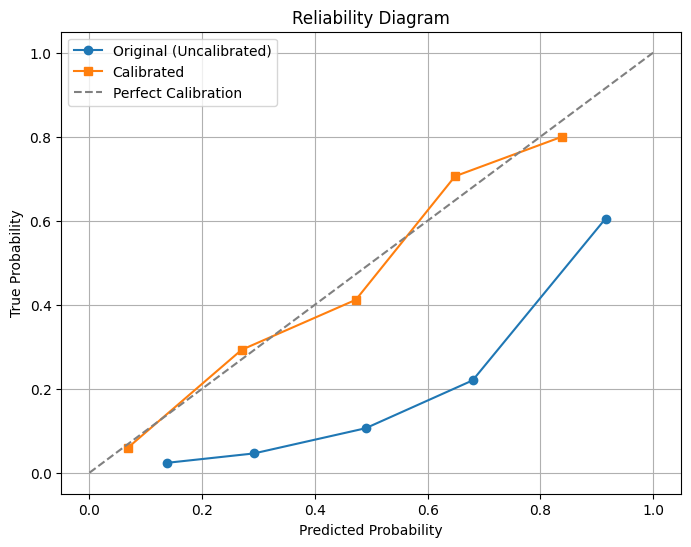

In [41]:
from sklearn.calibration import calibration_curve

# Calibration curve for original model
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=5)

# Calibration curve for calibrated model
cal_prob_true, cal_prob_pred = calibration_curve(y_test, calibrated_probs, n_bins=5)

plt.figure(figsize=(8, 6))

# Plot original
plt.plot(prob_pred, prob_true, marker='o', label='Original (Uncalibrated)')

# Plot calibrated
plt.plot(cal_prob_pred, cal_prob_true, marker='s', label='Calibrated')

# Perfectly calibrated line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')

plt.title("Reliability Diagram")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.legend()
plt.grid(True)
plt.show()


In [42]:
#next steps
#save model
#update analysis
#do more visualizations
#convert to .py files
#build backend with fast api
#build ui

In [43]:
#save model
#import pickle

#filename= 'xG_model.sav'
#pickle.dump(calibrator,open(filename,'wb'))

In [44]:
#Feature importance
import numpy as np
#access base estimator 
#lgreg= calibrator.base_estimator_
lgreg = calibrator.calibrated_classifiers_
print(type(lgreg))

#get coefficients
coefficients = np.array([clf.estimator.named_steps['lgr'].coef_.ravel() for clf in lgreg])
mean_coef = coefficients.mean(axis=0)
print(mean_coef)

intercept = np.array([clf.estimator.named_steps['lgr'].intercept_.ravel() for clf in lgreg])
mean_intercept = intercept.mean(axis=0)
odds_ratios =np.exp(mean_coef)
print(odds_ratios)



#get feature names
feature_names = (
    numeric_features +
    list(pipe.named_steps['preprocess'].transformers_[1][1].get_feature_names_out(categorical_features))
    )

print(feature_names)

#visualize coef
coef_df = pd.DataFrame({'feature':feature_names,
                        'coefficients':mean_coef,
                        'odds_ratios':odds_ratios
                        })


<class 'list'>
[-0.80218038  0.50681404  0.69279969  0.33495978  0.27513069  0.86395849
 -0.41368683  0.47023689  0.59486004  0.35402553 -0.05010064 -0.12831686
  2.25711262  0.40621987 -1.29723947 -0.10184067  0.75652357 -1.32538572
  0.7268139   1.97072837  0.89764306 -0.01128892 -0.82522322  0.27266101
  0.64443918]
[0.44835032 1.65999409 1.99930513 1.39788415 1.31670274 2.37253379
 0.66120799 1.60037326 1.8127772  1.42479156 0.95113369 0.87957463
 9.55545908 1.50113257 0.27328516 0.90317344 2.13085555 0.26570045
 2.06847972 7.17590133 2.45381281 0.98877456 0.43813718 1.31345492
 1.90491842]
['shot_distance', 'shot_angle', 'play_pattern_From Counter', 'play_pattern_From Free Kick', 'play_pattern_From Goal Kick', 'play_pattern_From Keeper', 'play_pattern_From Kick Off', 'play_pattern_From Throw In', 'play_pattern_Other', 'play_pattern_Regular Play', 'shot_technique_Diving Header', 'shot_technique_Half Volley', 'shot_technique_Lob', 'shot_technique_Normal', 'shot_technique_Overhead Ki

In [45]:
coef_df.sort_values('odds_ratios',ascending=False)

,feature,coefficients,odds_ratios
12,shot_technique_Lob,2.257113,9.555459
19,shot_type_Penalty,1.970728,7.175901
20,shot_type_set pieces,0.897643,2.453813
5,play_pattern_From Keeper,0.863958,2.372534
16,body_part_Left Foot,0.756524,2.130856
18,body_part_Right Foot,0.726814,2.068480
2,play_pattern_From Counter,0.692800,1.999305
24,1v1_shot_1,0.644439,1.904918
8,play_pattern_Other,0.594860,1.812777
1,shot_angle,0.506814,1.659994


Based on the model coefficients and their respective odds-ratio one can prelimarily conclude:
*   The negative coefficients indicate that shots taken from these scenario decreases the chance of goal, or reduces the quality of the shot
    *   In other words if everything else is constant as the shot distance increases or for every yard away from goal the odds of a high quality shot or scoring drops by 55%
    *   To further highlight this impact, one can easily appreciate the assumption that Overhead kicks are extremely difficult to score
        *   The data confirms this hypothesis; with each overhead shot the chance of scoring drops by 73%
    *   Interestingly a player that tries a volley shot is 10% less likely to score  or have a high quality shot. Which is reasonable as with a volley shot a player has a better opportunity to manipulate his body and prepare for the shot

* The positive coefficients indicate that shots taken from these scenarios increases the shot quality and chance of scoring
    *   Shot scenarios where a play takes a Lob shots significantly increases odds of scoring. So a play sequence which ends in a player taking a lob shot is 9 times more likely to score
    *   As expected penalities have a strong impact on the model, with their being a 70% chance of scoring from a penalty.   

In [46]:
#extract fitted model and preprocessor 
fitted_model = best_model.named_steps['lgr']
fitted_preprocessor = best_model.named_steps['preprocess']

type(fitted_preprocessor)

X_train_transformed = fitted_preprocessor.transform(X_train)
X_test_transformed = fitted_preprocessor.transform(X_test)
X_transformed_features = fitted_preprocessor.get_feature_names_out()

In [47]:
#using SHAP to find true feature importance 
import shap

explainer = shap.LinearExplainer(
    fitted_model,
    X_train_transformed)

shap_values = explainer.shap_values(X_test_transformed)


In [48]:
shap_explanation_values = explainer(X_test_transformed)
shap_values_oldway = explainer.shap_values(X_test_transformed)



In [49]:
print(len(X_transformed_features.tolist()))
print(len(shap_explanation_values.feature_names))

shap_explanation_map= shap.Explanation(
    values = shap_values_oldway,
    base_values= explainer.expected_value,
    data= X_test_transformed,
    feature_names= X_transformed_features

)

25
25


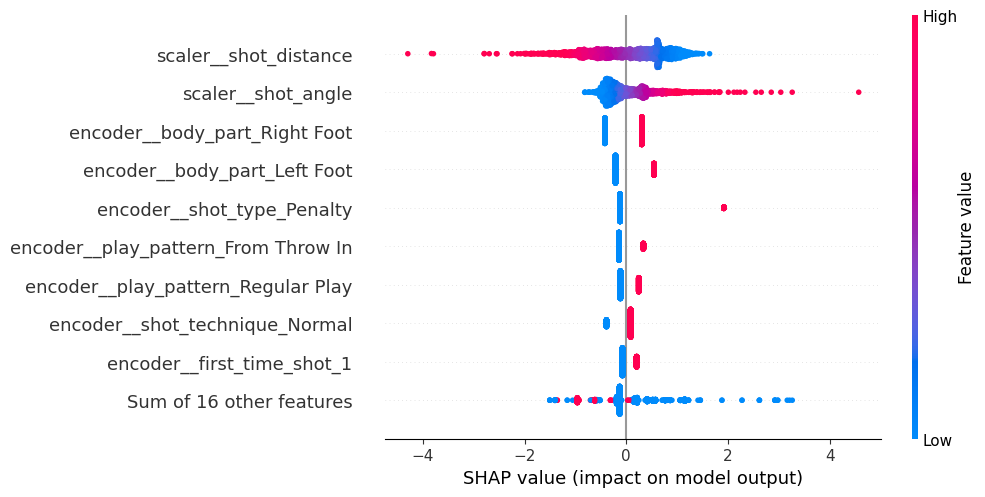

In [50]:
shap.plots.beeswarm(shap_explanation_map)

Feature Importance and what it means?
*   As expected shot distance and shot angle significantly impact the quality of a shot and whether it might score
    *   The further a shot is from goal will greatly reduce chances of scoring; high values are mostly negative
    *   Conversely, the closer a shot is to goal increase the likelihood of a goal or a higher quality shot
*   The closer a shot is to the cente goal the more likely it is to score or result in higher xG; as the angle in rads tends towards 1.57 (90 degrees) the higher the xG
    *   The more acute the angle of the shot or the more narrow a shot is the chances of scoring are lower. But compared to the effect for higher angles it's impact is relatively smaller.
*   Interestingly left foot shots are more likely to score than right.
    *   Left footed shots also are less likely to miss or result in low xG compared to right footed shots. The former with low values having neglible impact on predicted outcome
*   As expected and supported by the odds-ratio Penalities are more likely to score however high number of penalities are signficantly less compared to the other shots taken. 

In [51]:
#saved model and components

#from sklearn.externals import joblib
import joblib

In [52]:
#save gridsearch cv; best model

joblib.dump(grid_search,'explanation_model_base.joblib') #grid_search pipeline
joblib.dump(best_model,'explanation_model.joblib') #grid_search.best_estimator pipeline
joblib.dump(transformer,'preprocessor.joblib') #transformer pipeline ,Shouldn't need to but just incase

#save calibrated model
joblib.dump(calibrator,'prediction_model.joblib')

['prediction_model.joblib']

# Analysis



---

## Model Evaluation Summary – Predicting xG with Logistic Regression

This model aims to predict **expected goals (xG)** using logistic regression. Rather than simply classifying shots as goals or no goals, the goal is to estimate the **probability** of a shot resulting in a goal.

### Target Variable

* The original `shot_outcome` was converted into a binary format:

  * `1` = Goal
  * `0` = No Goal
* Class imbalance: only **11.6%** of the data represented actual goals.

---

## Why This Matters

* Since goals are rare events, **false positives** (predicting a goal when it wasn’t) can skew match evaluations.
* Thus, **precision** is a more critical metric than recall in this context.

  * We care more about being right **when** we say a shot will result in a goal.

---

## Training Set Evaluation

### Classification Report Highlights:

* **Recall (Goal class)**: `0.70` → Model is good at finding actual goals  (true positives).
* **Precision (Goal class)**: `0.32` → A lower score here means many false positives.
* **Weighted Precision**: `0.88` and **Weighted Recall**: `0.79`

  * Shows the model does a **strong job overall**, especially for the dominant "no goal" class.
* **F1 Score (weighted)**: `0.82` – reasonable balance across classes.

### Brier Score (Train): `0.159`

* Measures **probabilistic accuracy** – lower is better.
* Indicates the model’s confidence is fairly well calibrated during training.

---

## Test Set Evaluation

### Signs of Slight Overfitting:

| Metric           | Train | Test  |
| ---------------- | ----- | ----- |
| Accuracy         | 0.79  | 0.79  |
| AUC              | 0.83  | 0.83  |
| Brier Score      | 0.159 | 0.162 |
| Precision (Goal) | 0.32  | 0.32  |
| Recall (Goal)    | 0.70  | 0.72  |

* Minimal Increase in **recall** for goals shows the model is **slightly more confident** classifying goals in the test set.
* **Weighted averages** are consistent, but highlight the challenge of predicting the minority class.
* **Precision** did not chnage; acceptable — the model is still fairly reliable at distinguishing true goal events from false alarms.

---

## Hyperparameter Tuning Impact

* Tuning had **minimal effect**:

  * Accuracy, Precision, Recall stayed the same.
  * Brier Score **slightly improved** to `0.1618`.
* This suggests the base logistic regression model was already fairly optimized for this data.

---

## Calibration for Better Probabilities

* Used `CalibratedClassifierCV` with the **sigmoid** method.
* **Brier Score improved significantly** to `0.076` 
* Calibration helped fix the model's overconfidence — especially in the **0.3–0.6** probability range.

---

## Final Thoughts

* Logistic regression performs well as a **baseline xG model**.
* The model generalizes well and was is fairly stable based on the closeness of training and test values
* Calibration notably **improves probabilistic predictions**, making the model more trustworthy in decision-making scenarios.

> Next Steps:
    1.   Consider experimenting with tree-based models (e.g., XGBoost), or ensemble methods for handling imbalance and capturing non-linear patterns.
    2.  Polynomial function instead of logistic regression? 


---


